In [2]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import descartes
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx

%matplotlib inline


In [3]:
#Read in shape file
ufo_map = gpd.read_file('cb_2018_us_nation_5m/cb_2018_us_nation_5m.shp')

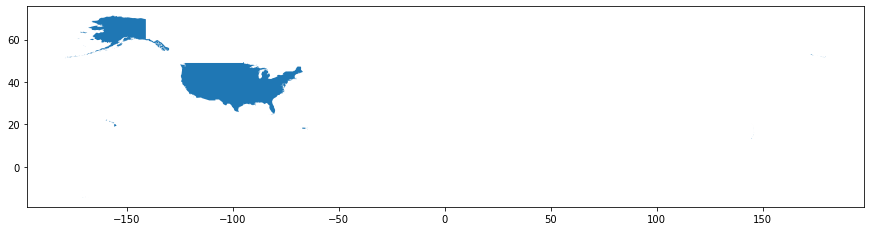

In [100]:
#fig,ax = plt.subplots()
ufo_map.plot(figsize=(15,10)).set_xlim=(0,50)



In [5]:
#Read in alien data and add basemap layer 

alien_df = pd.read_csv('../project-1-alien-analysis/alien_region.csv')
crs = {'init': 'epsg:4326'}


/Users/mecross/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#Create points for latitude and longitude 
geometry = [Point(xy) for xy in zip(alien_df["longitude "], alien_df["latitude"])]
geometry[:3]

In [7]:
#Use points to create GeoDataFrame 
geo_alien_df = gpd.GeoDataFrame(alien_df, 
                              crs = crs, #specifying coordinate reference system
                              geometry = geometry) #specify geometry list we've created

geo_alien_df.head()

,Unnamed: 0,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year,region,geometry
0,0,10/10/1993 22:00,peoria,il,us,light,8,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993,Midwest,POINT (-89.58889 40.69361)
1,1,10/10/1998 13:15,elgin,il,us,cylinder,1800,30 +/- min,While looking up at sky I noticed a bright lig...,11/1/1998,42.037222,-88.281111,10,10,13:15,1998,Midwest,POINT (-88.28111 42.03722)
2,2,10/10/2004 15:00,rock island,il,us,sphere,3600,1 hour,The sky was clear and the objects at times ap...,10/27/2004,41.509444,-90.578611,10,10,15:00,2004,Midwest,POINT (-90.57861 41.50944)
3,3,10/10/2010 20:45,sterling,il,us,cylinder,600,10min,It had rows of white lights with red lights pu...,11/21/2010,41.788611,-89.696111,10,10,20:45,2010,Midwest,POINT (-89.69611 41.78861)
4,4,10/10/2012 20:30,marion,il,us,light,240,2 to 4 minutes,I was leaving my friend&#39s house to go home....,10/30/2012,37.730556,-88.933056,10,10,20:30,2012,Midwest,POINT (-88.93306 37.73056)


In [8]:
#Establish bounds to zoom in on map 
ufo_bounds = ufo_map.geometry.total_bounds
ufo_bounds

#Create x and y mins and max to establish bounds
xmin, ymin, xmax, ymax = ufo_bounds

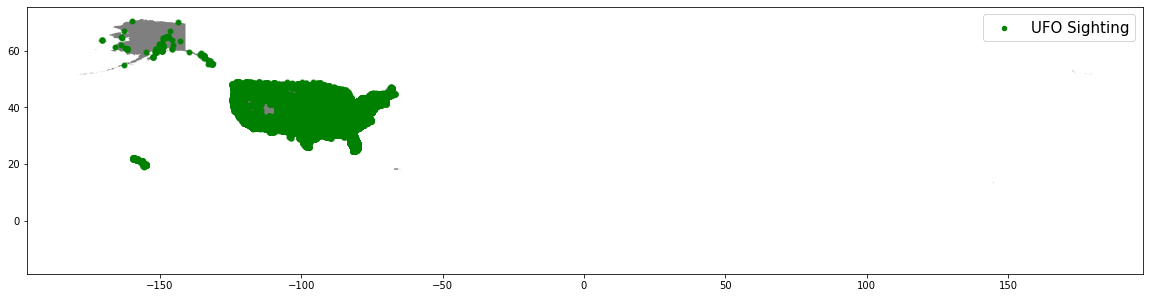

In [9]:
#Map of every datapoint for all time

fig,ax = plt.subplots(figsize = (20,10))
ufo_map.plot(color='black', ax = ax, alpha=0.5)
geo_alien_df.plot(ax = ax, alpha = 0.2, color ="green")
geo_alien_df.plot(ax = ax, markersize = 20, color = "green", marker = "o", label = "UFO Sighting")
plt.legend(prop={'size': 15})



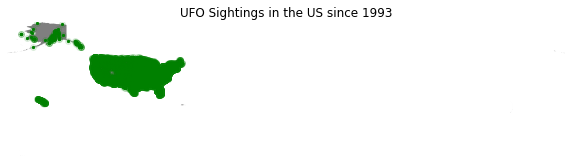

In [10]:
#Zoom into map 

#use the boundary set earlier to set the min and max values for the plot
ufo_map.total_bounds

# Plot the data with a modified spatial extent
fig, ax = plt.subplots(figsize = (10,6))
xlim = ([ufo_map.total_bounds[0],  ufo_map.total_bounds[2]])
ylim = ([ufo_map.total_bounds[1],  ufo_map.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

#Plot map details 

ufo_map.plot(color='black', alpha = 0.5, ax = ax)
geo_alien_df.plot(color='green', ax=ax, alpha=0.1)

#Set title, legend, and axis
ax.set(title='UFO Sightings in the US since 1993')
geo_alien_df.plot(ax = ax, markersize = 5, color = "green", marker = "o", label = "UFO Sighting")
ax.set_axis_off()
plt.show()



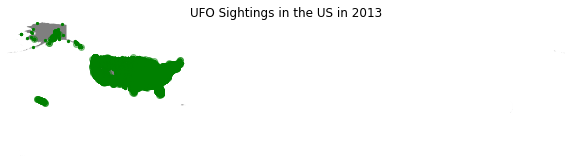

In [11]:
#Zoom into map 

#use the boundary set earlier to set the min and max values for the plot
ufo_map.total_bounds

# Plot the data with a modified spatial extent
fig, ax = plt.subplots(figsize = (10,6))
xlim = ([ufo_map.total_bounds[0],  ufo_map.total_bounds[2]])
ylim = ([ufo_map.total_bounds[1],  ufo_map.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

#Plot map details 

ufo_map.plot(color='black', alpha = 0.5, ax = ax)
geo_alien_df[geo_alien_df['Year'] == 2013].plot(ax = ax, alpha = 0.4, color ="green")

#Set title, legend, and axis
ax.set(title='UFO Sightings in the US in 2013')
geo_alien_df.plot(ax = ax, markersize = 5, color = "green", marker = "o", label = "UFO Sighting")
ax.set_axis_off()
plt.show()

In [76]:
#Map of sightings in 2013; attempt to zoom in with .total_bounds

#Establish bounds to zoom in on map 
ufo_bounds = ufo_map.geometry.total_bounds
ufo_bounds

#Create x and y mins and max to establish bounds
xmin, ymin, xmax, ymax = ufo_bounds

#use the boundary to set the min and max values for the plot
ufo_map.total_bounds

# Plot the data with a modified spatial extent
# fig, ax = plt.subplots(figsize = (10,6))
# xlim = ([ufo_map.total_bounds[0],  ufo_map.total_bounds[2]])
# ylim = ([ufo_map.total_bounds[1],  ufo_map.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

#Plot map 

fig,ax = plt.subplots()
ufo_map.plot(color='black', ax = ax, alpha=0.5)
geo_alien_df[geo_alien_df['Year'] == 2013].plot(ax = ax, alpha = 0.4, color ="green", markersize = 0.5)
plt.legend(prop={'size': 10})

ax.set(title='UFO Sightings in the US in 2013')
ax.set_axis_off()
plt.axis('equal')
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)


No handles with labels found to put in legend.


(-197.0936305, 197.7247605, -18.8478045, 75.64781649999999)

(<Figure size 432x288 with 9 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a230121d0>,
       dtype=object))

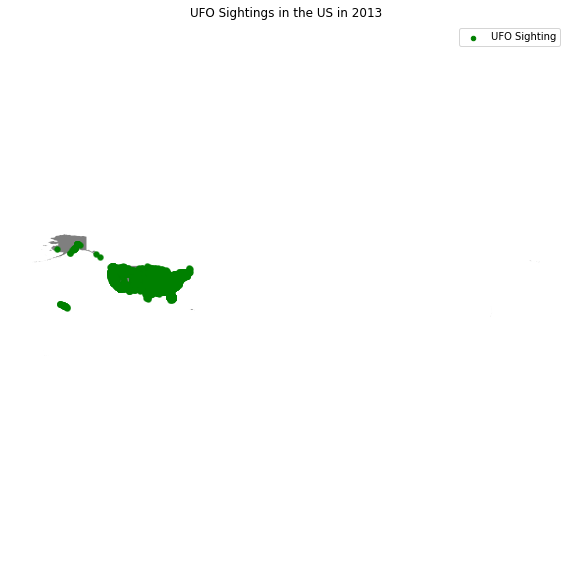

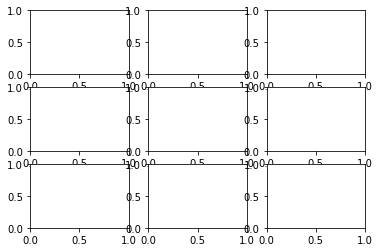

In [38]:
#Set fig size in inches 

fig,ax = plt.subplots()
fig.set_size_inches((10, 10))
ufo_map.plot(color='black', ax = ax, alpha=0.5)
geo_alien_df[geo_alien_df['Year'] == 2013].plot(ax = ax, alpha = 0.4, color ="green")
geo_alien_df[geo_alien_df['Year'] == 2013].plot(ax = ax, markersize = 20, color = "green", marker = "o", label = "UFO Sighting")
plt.legend(prop={'size': 10})

ax.set(title='UFO Sightings in the US in 2013')
ax.set_axis_off()
plt.axis('equal')
plt.subplots(3, 3)

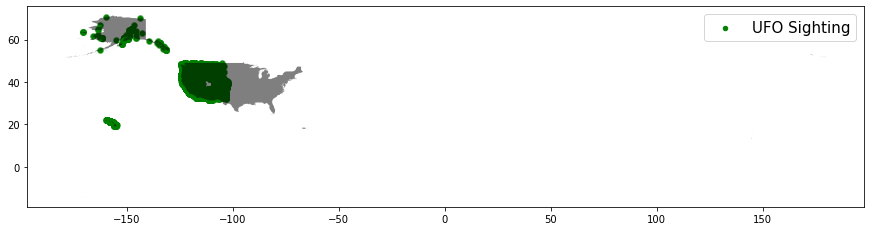

In [13]:
#Map of Western region 
#loc and make new df by West 
fig,ax = plt.subplots(figsize = (15,15))
geo_alien_df[geo_alien_df['region'] == 'West'].plot(ax = ax, alpha = 0.4, color ="green")
geo_alien_df[geo_alien_df['region'] == 'West'].plot(ax = ax, markersize = 20, color = "green", marker = "o", label = "UFO Sighting")
ufo_map.plot(color='black', ax=ax, alpha=.5)
plt.legend(prop={'size': 15})

In [14]:
#New method to plot data on map with detail 

# ufo_world_map = geo_alien_df.read_file(geo_alien_df.datasets.get_path('naturalearth_lowres'))
# base = ufo_world_map.plot(color='white', edgecolor='black')
# ufo_world_map.plot(ax=base, marker='o', color='red', markersize=5)

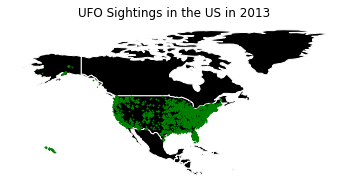

In [62]:
#Plot on geopandas map instead of importing shapefile

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to North America.
ax = world[world.continent == 'North America'].plot(
    color='black', edgecolor='white')

# We can now plot our ``GeoDataFrame``.
geo_alien_df[geo_alien_df['Year'] == 2013].plot(ax=ax, color='green', markersize=0.5)
ax.set_axis_off()
ax.set(title='UFO Sightings in the US in 2013')

plt.savefig("UFO Map in 2013")
plt.show()

In [101]:
#Plot on geopandas map

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to North America.
ax = world[world.continent == 'North America'].plot(
    color='black', edgecolor='white', figsize=(20,10))

# Create a custom polygon
# polygon = Polygon([(0, 0), (0, 90), (180, 90), (180, 0), (0, 0)])
# poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=world.crs)

# We can now plot our ``GeoDataFrame``.
geo_alien_df.plot(ax=ax, color='green', markersize=0.5)
ax.set_axis_off()
ax.set(title='UFO Sightings in the US from 1993-2013')
#plt.legend(fontsize=26, labels='UFO Sightings in the US from 1993-2013', loc='center')

#plt.savefig("UFO Sightings in the US from 1993-2013")
plt.show()

AttributeError: 'Series' object has no attribute 'country'

In [81]:
#Clip the data to USA 

usa_clipped = gpd.clip(world, polygon)

# Plot the clipped data
# The plot below shows the results of the clip function applied to the world
# sphinx_gallery_thumbnail_number = 2

fig, ax = plt.subplots(figsize=(12, 8))
usa_clipped.plot(ax=ax, color="purple")
world.boundary.plot(ax=ax)
poly_gdf.boundary.plot(ax=ax, color="red")
ax.set_title(fontsize=20)
ax.set_axis_off()
plt.show()

AttributeError: module 'geopandas' has no attribute 'clip'

In [103]:
states = gpd.read_file('data/usa-states-census-2014.shp')
type(states)

states.head()

DriverError: data/usa-states-census-2014.shp: No such file or directory